![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (50+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

## Table of Contents

1. [Installation](#installation)
2. [The Toolkit Module](#the-toolkit-module)
3. [The Ratios Module](#the-ratios-module)
4. [The Models Module](#the-models-module)
5. [Calling Functions Directly](#calling-functions-directly)

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
The dependencies of the package are on purpose *very slim* so that it will work well with any combination of packages and not result in conflicts. I've also been careful with my selection in which I leave out functionality like technical analysis in which [ta-lib](https://ta-lib.org/) does an excellent job as well as portfolio attribution and optimisation in which [Riskfolio-lib](https://riskfolio-lib.readthedocs.io/en/latest/index.html) shines and lastly allow for any source to be incorporated to allow for the incorporation of data sources from [OpenBB](https://openbb.co/).

In [1]:
import pandas as pd
import numpy as np


from financetoolkit import Toolkit
import os
API_KEY = os.environ.get("FINANCE_API")

# The Toolkit Module

Initializing only is required once. This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY)

C:\Users\nkutm\AppData\Local\Temp/ipykernel_9288/2811361391.py:2: DeprecationWarning: This version of the Finance Toolkit is depreciated. Finance Toolkit 1.0.3 and onwards require Python 3.10 and higher. Please update to the latest version of Python and the Finance Toolkit.
  companies = Toolkit(["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY)


Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2023-06-06  179.210007  126.610001  127.309998  333.679993  179.210007   
2023-06-07  177.820007  121.230003  122.500000  323.380005  177.820007   
2023-06-08  180.570007  124.250000  122.139999  325.260010  180.570007   
2023-06-09  180.960007  123.430000  122.230003  326.790009  180.960007   
2023-06-12  183.789993  126.570000  123.639999  331.850006  183.789993   
2023-06-13  183.309998  126.660004  123.830002  334.290009  183.309998   
2023-06-14  183.949997  126.419998  123.669998  337.339996  183.949997   
2023-06-15  186.009995  127.110001  125.089996  348.100006  186.009995   
2023-06-16  184.919998  125.489998  123.529999  342.329987  184.919998   
2023-06-20  185.009995  125.779999  123.099998  338.049988  185.009995   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2023-06-06  126.610001  127.309998  333.679993  180.119995  127.400002  ...   
2023-06-07  121.230003  122.500000  323.380005  181.210007  127.370003  ...   
2023-06-08  124.250000  122.139999  325.260010  180.839996  125.629997  ...   
2023-06-09  123.430000  122.230003  326.790009  182.229996  125.800003  ...   
2023-06-12  126.570000  123.639999  331.850006  183.889999  126.779999  ...   
2023-06-13  126.660004  123.830002  334.290009  184.149994  128.410004  ...   
2023-06-14  126.419998  123.669998  337.339996  184.389999  126.949997  ...   
2023-06-15  127.110001  125.089996  348.100006  186.520004  127.690002  ...   
2023-06-16  125.489998  123.529999  342.329987  186.990005  127.900002  ...   
2023-06-20  125.779999  123.099998  338.049988  186.100006  127.250000  ...   

                   Low                    Open                          \
                 GOOGL        MSFT        AAPL        AMZN       GOOGL   
Date                                                                     
2023-06-06  125.360001  332.170013  179.970001  125.070000  126.010002   
2023-06-07  122.120003  322.500000  178.440002  127.010002  126.970001   
2023-06-08  121.239998  323.350006  177.899994  123.010002  122.230003   
2023-06-09  121.910004  324.410004  181.500000  124.080002  122.250000   
2023-06-12  121.660004  325.160004  181.270004  124.019997  122.790001   
2023-06-13  123.180000  330.390015  182.800003  128.119995  124.980003   
2023-06-14  121.449997  332.809998  183.369995  126.699997  123.099998   
2023-06-15  122.400002  337.200012  183.960007  125.209999  123.139999   
2023-06-16  123.279999  341.950012  186.729996  127.709999  125.930000   
2023-06-20  122.139999  335.859985  184.410004  124.970001  122.930000   

                           Volume                                  
                  MSFT       AAPL      AMZN       GOOGL      MSFT  
Date                                                               
2023-06-06  335.329987   64848400  45695200  26638300.0  20396200  
2023-06-07  331.649994   61944600  95663300  52539000.0  40717100  
2023-06-08  323.940002   50214900  62159300  29389200.0  23277700  
2023-06-09  324.989990   48870700  51330000  23762500.0  22514900  
2023-06-12  328.579987   54274900  51338000  28306400.0  24260300  
2023-06-13  334.470001   54929100  50564800  22278300.0  22951300  
2023-06-14  334.339996   57462900  52422500  30592300.0  26003800  
2023-06-15  337.480011   65433200  60458500  35246300.0  38899100  
2023-06-16  351.320007  101235600  84188100  45514000.0  46533600  
2023-06-20  339.309998   49753200  56857600  26071300.0  26351400  

[10 rows x 24 columns]

Adj Close                                           Close              \
            AAPL        AMZN       GOOGL        MSFT        AAPL        AMZN   
Date                                                                           
2014   24.767366   15.517500   26.533001   40.351379   27.594999   15.517500   
2015   24.020950   33.794498   38.900501   49.507847   26.315001   33.794498   
2016   27.018864   37.493500   39.622501   56.972500   28.955000   37.493500   
2017   40.113380   58.473499   52.669998   80.177757   42.307499   58.473499   
2018   37.951183   75.098503   52.248001   96.850960   39.435001   75.098503   
2019   71.711731   92.391998   66.969498  152.596558   73.412498   92.391998   
2020  130.735306  162.846497   87.632004  217.502060  132.690002  162.846497   
2021  176.032730  166.716995  144.852005  331.640472  177.570007  166.716995   
2022  129.552719   84.000000   88.230003  238.699020  129.929993   84.000000   
2023  185.009995  125.779999  123.099998  338.049988  185.009995  125.779999   

                                    High              ...         Low  \
           GOOGL        MSFT        AAPL        AMZN  ...       GOOGL   
Date                                                  ...               
2014   26.533001   46.450001   28.282499   15.649000  ...   26.510000   
2015   38.900501   55.480000   26.757500   34.387501  ...   38.866001   
2016   39.622501   62.139999   29.299999   38.369999  ...   39.480999   
2017   52.669998   85.540001   42.647499   59.200001  ...   52.634998   
2018   52.248001  101.570000   39.840000   76.038002  ...   51.652000   
2019   66.969498  157.699997   73.419998   92.663002  ...   66.606499   
2020   87.632004  222.419998  134.740005  164.145996  ...   86.804497   
2021  144.852005  336.320007  179.229996  169.350006  ...  144.852005   
2022   88.230003  239.820007  129.949997   84.050003  ...   86.570000   
2023  123.099998  338.049988  186.100006  127.250000  ...  122.139999   

                        Open                                         Volume  \
            MSFT        AAPL        AMZN       GOOGL        MSFT       AAPL   
Date                                                                          
2014   46.450001   28.205000   15.577500   26.886999   46.730000  165613600   
2015   55.419998   26.752501   34.304001   39.390999   56.040001  163649200   
2016   62.029999   29.162500   38.323502   40.160500   62.959999  122345200   
2017   85.500000   42.630001   59.117500   52.774502   85.629997  103999600   
2018  100.440002   39.632500   75.540001   52.891499  101.290001  140014000   
2019  156.449997   72.482498   92.099998   66.789497  156.770004  100805600   
2020  219.679993  134.080002  163.750000   86.863503  221.699997   99116600   
2021  335.850006  178.089996  168.955994  146.050003  338.510010   64062300   
2022  236.660004  128.410004   83.120003   86.980003  238.210007   77034200   
2023  335.859985  184.410004  124.970001  122.930000  339.309998   49753200   

                                       
           AMZN       GOOGL      MSFT  
Date                                   
2014   40960000  24648000.0  21552500  
2015   74992000  32752000.0  27334100  
2016   82788000  34718000.0  25579900  
2017   53768000  23606000.0  18717400  
2018  139090000  33110000.0  33173800  
2019   50130000  19514000.0  18369400  
2020   59144000  21070000.0  20942100  
2021   47830000  18136000.0  18000800  
2022   62401200  23986300.0  21938500  
2023   56857600  26071300.0  26351400  

[10 rows x 24 columns]

<AxesSubplot:xlabel='Date'>

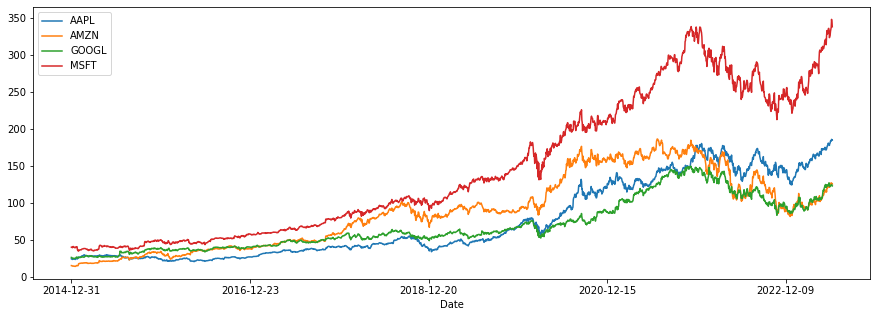

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data(start="2000-01-01").tail(10))

# Obtain yearly historical data from each company
display(companies.get_historical_data(start="2010-01-01", period="yearly").tail(10))

# Plot the Adjusted Close Prices
companies.get_historical_data(start="2015-01-01")["Adj Close"].plot(figsize=(15, 5))

In [4]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

date                                          2022          2021  \
AAPL Cash and Cash Equivalents         23646000000   34940000000   
     Short Term Investments            24658000000   27699000000   
     Cash and Short Term Investments   48304000000   62639000000   
     Accounts Receivable               60932000000   51506000000   
     Inventory                          4946000000    6580000000   
...                                            ...           ...   
MSFT Minority Interest                           0             0   
     Total Liabilities and Equity     364840000000  333779000000   
     Total Investments                 97709000000  122094000000   
     Total Debt                        61270000000   67775000000   
     Net Debt                          47339000000   53551000000   

date                                          2020          2019  \
AAPL Cash and Cash Equivalents         38016000000   48844000000   
     Short Term Investments            52927000000   51713000000   
     Cash and Short Term Investments   90943000000  100557000000   
     Accounts Receivable               37445000000   45804000000   
     Inventory                          4061000000    4106000000   
...                                            ...           ...   
MSFT Minority Interest                           0             0   
     Total Liabilities and Equity     301311000000  286556000000   
     Total Investments                125916000000  125112000000   
     Total Debt                        70998000000   78366000000   
     Net Debt                          57422000000   67010000000   

date                                          2018          2017  \
AAPL Cash and Cash Equivalents         25913000000   20289000000   
     Short Term Investments            40388000000   53892000000   
     Cash and Short Term Investments   66301000000   74181000000   
     Accounts Receivable               48995000000   35673000000   
     Inventory                          3956000000    4855000000   
...                                            ...           ...   
MSFT Minority Interest                           0             0   
     Total Liabilities and Equity     258848000000  241086000000   
     Total Investments                123684000000  131341000000   
     Total Debt                        81808000000   86194000000   
     Net Debt                          69862000000   78531000000   

date                                          2016          2015  \
AAPL Cash and Cash Equivalents         20484000000   21120000000   
     Short Term Investments            46671000000   20481000000   
     Cash and Short Term Investments   67155000000   41601000000   
     Accounts Receivable               29299000000   30343000000   
     Inventory                          2132000000    2349000000   
...                                            ...           ...   
MSFT Minority Interest                           0             0   
     Total Liabilities and Equity     193694000000  176223000000   
     Total Investments                117161000000  102984000000   
     Total Debt                        53687000000   35292000000   
     Net Debt                          47177000000   29697000000   

date                                          2014          2013  ...  \
AAPL Cash and Cash Equivalents         13844000000   14259000000  ...   
     Short Term Investments            11233000000   26287000000  ...   
     Cash and Short Term Investments   25077000000   40546000000  ...   
     Accounts Receivable               27219000000   20641000000  ...   
     Inventory                          2111000000    1764000000  ...   
...                                            ...           ...  ...   
MSFT Minority Interest                           0             0  ...   
     Total Liabilities and Equity     172384000000  142431000000  ...   
     Total Investments                 91637000000   84062000000  ...   
  

In [5]:
# Obtain the income statements from each company
companies.get_income_statement()

date                                            2022          2021  \
AAPL Revenue                            394328000000  365817000000   
     Cost of Goods Sold                 223546000000  212981000000   
     Gross Profit                       170782000000  152836000000   
     Gross Profit Ratio                     0.433096      0.417794   
     Research and Development Expenses   26251000000   21914000000   
...                                              ...           ...   
MSFT Net Income Ratio                       0.366863      0.364517   
     EPS                                         9.7          8.12   
     EPS Diluted                                9.65          8.05   
     Weighted Average Shares              7496000000    7547000000   
     Weighted Average Shares Diluted      7540000000    7608000000   

date                                            2020          2019  \
AAPL Revenue                            274515000000  260174000000   
     Cost of Goods Sold                 169559000000  161782000000   
     Gross Profit                       104956000000   98392000000   
     Gross Profit Ratio                     0.382332      0.378178   
     Research and Development Expenses   18752000000   16217000000   
...                                              ...           ...   
MSFT Net Income Ratio                       0.309625      0.311817   
     EPS                                        5.82          5.11   
     EPS Diluted                                5.76          5.06   
     Weighted Average Shares              7610000000    7673000000   
     Weighted Average Shares Diluted      7683000000    7753000000   

date                                            2018          2017  \
AAPL Revenue                            265595000000  229234000000   
     Cost of Goods Sold                 163756000000  141048000000   
     Gross Profit                       101839000000   88186000000   
     Gross Profit Ratio                     0.383437      0.384699   
     Research and Development Expenses   14236000000   11581000000   
...                                              ...           ...   
MSFT Net Income Ratio                       0.150154      0.235731   
     EPS                                        2.15          2.74   
     EPS Diluted                                2.13          2.71   
     Weighted Average Shares              7700000000    7746000000   
     Weighted Average Shares Diluted      7794000000    7832000000   

date                                            2016          2015  \
AAPL Revenue                            215639000000  233715000000   
     Cost of Goods Sold                 131376000000  140089000000   
     Gross Profit                        84263000000   93626000000   
     Gross Profit Ratio                      0.39076      0.400599   
     Research and Development Expenses   10045000000    8067000000   
...                                              ...           ...   
MSFT Net Income Ratio                       0.196882      0.130295   
     EPS                                        2.12          1.49   
     EPS Diluted                                 2.1          1.48   
     Weighted Average Shares              7925000000    8177000000   
     Weighted Average Shares Diluted      8013000000    8254000000   

date                                            2014          2013  ...  \
AAPL Revenue                            182795000000  170910000000  ...   
     Cost of Goods Sold                 112258000000  106606000000  ...   
     Gross Profit                        70537000000   64304000000  ...   
     Gross Profit Ratio                      0.38588      0.376245  ...   
     Research and Development Expenses    6041000000    4475000000  ...   
...                                              ...           ...  ...   
MSFT Net Income Ratio                       0.254212      0.280839  ...   
     EPS                            

In [6]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

date                                        2022          2021          2020  \
AAPL Net Income                      99803000000   94680000000   57411000000   
     Depreciation and Amortization   11104000000   11284000000   11056000000   
     Deferred Income Tax               895000000   -4774000000    -215000000   
     Stock Based Compensation         9038000000    7906000000    6829000000   
     Change in Working Capital        1200000000   -4911000000    5690000000   
...                                          ...           ...           ...   
MSFT Cash End of Period              13931000000   14224000000   13576000000   
     Cash Beginning of Period        14224000000   13576000000   11356000000   
     Operating Cash Flow             89035000000   76740000000   60675000000   
     Capital Expenditure            -23886000000  -20622000000  -15441000000   
     Free Cash Flow                  65149000000   56118000000   45234000000   

date                                        2019          2018         2017  \
AAPL Net Income                      55256000000   59531000000  48351000000   
     Depreciation and Amortization   12547000000   10903000000  10157000000   
     Deferred Income Tax              -340000000  -32590000000   5966000000   
     Stock Based Compensation         6068000000    5340000000   4840000000   
     Change in Working Capital       -3488000000   34694000000  -5550000000   
...                                          ...           ...          ...   
MSFT Cash End of Period              11356000000   11946000000   7663000000   
     Cash Beginning of Period        11946000000    7663000000   6510000000   
     Operating Cash Flow             52185000000   43884000000  39507000000   
     Capital Expenditure            -13925000000  -11632000000  -8129000000   
     Free Cash Flow                  38260000000   32252000000  31378000000   

date                                       2016         2015         2014  \
AAPL Net Income                     45687000000  53394000000  39510000000   
     Depreciation and Amortization  10505000000  11257000000   7946000000   
     Deferred Income Tax             4938000000   1382000000   2347000000   
     Stock Based Compensation        4210000000   3586000000   2863000000   
     Change in Working Capital        484000000  11647000000   7047000000   
...                                         ...          ...          ...   
MSFT Cash End of Period              6510000000   5595000000   8669000000   
     Cash Beginning of Period        5595000000   8669000000   3804000000   
     Operating Cash Flow            33325000000  29080000000  32231000000   
     Capital Expenditure            -8343000000  -5944000000  -5485000000   
     Free Cash Flow                 24982000000  23136000000  26746000000   

date                                       2013  ...        1998         1997  \
AAPL Net Income                     37037000000  ...   309000000  -1045000000   
     Depreciation and Amortization   6757000000  ...   111000000    118000000   
     Deferred Income Tax             1141000000  ...     1000000     -7000000   
     Stock Based Compensation        2253000000  ...           0            0   
     Change in Working Capital       6478000000  ...   387000000    670000000   
...                                         ...  ...         ...          ...   
MSFT Cash End of Period              3804000000  ...  3839000000            0   
     Cash Beginning of Period        6938000000  ...  3706000000   2601000000   
     Operating Cash Flow            28833000000  ...  6880000000   4689000000   
     Capital Expenditure            -4257000000  ...  -656000000   -499000000   
     Free Cash Flow                 24576000000  ...  6224000000   4190000000   

date                                      1996        1995        1994  \
AAPL Net Income                     -816000000   424000000   310178000   
     Depreciation and Amortization   1560000

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
Cash and Cash Equivalents,53888000000,36220000000,42122000000,36092000000,31750000000,20522000000,19334000000,15890000000,14557000000,8658000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Term Investments,16138000000,59829000000,42274000000,18929000000,9500000000,10464000000,6647000000,3918000000,2859000000,3789000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cash and Short Term Investments,70026000000,96049000000,84396000000,55021000000,41250000000,30986000000,25981000000,19808000000,17416000000,12447000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accounts Receivable,42360000000,32891000000,24542000000,20816000000,16677000000,13164000000,8339000000,6423000000,5612000000,4767000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inventory,34405000000,32640000000,23795000000,20497000000,17174000000,16047000000,11461000000,10243000000,8299000000,7411000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,date,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
AAPL,Accounts Receivable,60932000000,51506000000,37445000000,45804000000,48995000000,35673000000,29299000000,30343000000,27219000000,20641000000,...,1581347000,1381900000,1087200000,907200000,761900000,792800000,638800000,405600000,263100000,220200000
AMZN,Accounts Receivable,42360000000,32891000000,24542000000,20816000000,16677000000,13164000000,8339000000,6423000000,5612000000,4767000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOGL,Accounts Receivable,40258000000,40270000000,31384000000,27492000000,21193000000,18705000000,14232000000,13909000000,11556000000,9390000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSFT,Accounts Receivable,44261000000,38043000000,32011000000,29524000000,26481000000,19792000000,18277000000,17908000000,19544000000,17486000000,...,475000000,338000000,823700000,243300000,181000000,111200000,93600000,55100000,34500000,NaN


<AxesSubplot:>

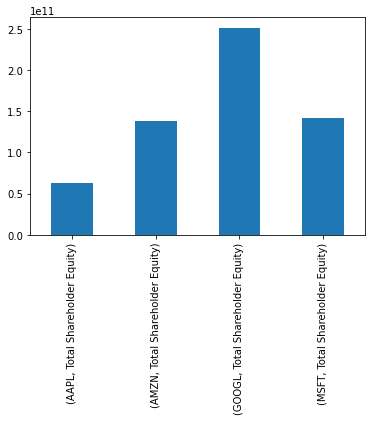

In [7]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Accounts Receivable for each company
display(balance_sheet.loc[:, "Accounts Receivable", :])

# Plot the value of Total Shareholder Equity for each company in 2021
balance_sheet.loc[:, "Total Shareholder Equity", :][2021].plot(kind="bar")

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [8]:
companies.get_profile()

,AAPL,MSFT,GOOGL,AMZN
symbol,AAPL,MSFT,GOOGL,AMZN
price,185.01,338.05,123.1,125.78
beta,1.289436,0.927464,1.091901,1.257042
volAvg,58085033,28349087,34316066,62091466
mktCap,2909966863964,2513567324186,1566225958777,1290553128100
lastDiv,0.96,2.72,0,0.2
range,124.17-186.99,213.43-351.47,83.34-129.04,81.43-146.57
changes,0.09,-4.28,-0.43,0.29
companyName,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
currency,USD,USD,USD,USD


# The Ratios Module

After initialization of `Toolkit`, you can get access to the Ratios module which includes over 50 different ratios. This can be done by calling the `ratios` property.

In [9]:
ratios = companies.ratios

help(ratios)

Help on Ratios in module financetoolkit.base.ratios_controller object:

class Ratios(builtins.object)
 |  Ratios(tickers, historical, balance, income, cash)
 |  
 |  Ratios Controller Class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers, historical, balance, income, cash)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  collect_all_ratios(self, include_dividends: bool = False, diluted: bool = True, days=365)
 |      Calculates all Ratios based on the data provided.
 |  
 |  collect_efficiency_ratios(self, days=365)
 |      Calculates all Efficiency Ratios based on the data provided.
 |  
 |  collect_liquidity_ratios(self)
 |      Calculates all Liquidity Ratios based on the data provided.
 |  
 |  collect_profitability_ratios(self)
 |      Calculates all Profitability Ratios based on the data provided.
 |  
 |  collect_solvency_ratios(self, diluted: bool = True)
 |      Calculates all Solvency Ratios based on the data provided.
 |  
 |  co

Within this ratios module, the distinction is made between `collect_` and `get_`. The former obtains a collection of ratios (e.g. all solvency ratios) whereas the latter obtains a specific ratio.

In [10]:
ratios.collect_valuation_ratios()

An error occurred while trying to run the function get_price_earnings_ratio. This is Unable to coerce to DataFrame, shape must be (8, 38): given (4, 0). Usually this is due to incomplete financial statements. 
An error occurred while trying to run the function get_price_earnings_ratio. This is Unable to coerce to DataFrame, shape must be (8, 38): given (4, 0). Usually this is due to incomplete financial statements. 
An error occurred while trying to run the function get_price_to_book_ratio. This is Unable to coerce to DataFrame, shape must be (12, 38): given (4, 0). Usually this is due to incomplete financial statements. 


ZeroDivisionError: float division by zero

In [ ]:
ratios.get_effective_tax_rate()

date,2018,2019,2020,2021,2022
AAPL,0.183422,0.159438,0.144282,0.133023,0.162045
AMZN,0.106296,0.169863,0.118413,0.12558,0.541947
GOOGL,0.11964,0.1333,0.162493,0.162023,0.159208
MSFT,0.545676,0.101813,0.165077,0.138266,0.131134


Some of these ratios also include optional fields depending on whether there is room for different methods of calculation. E.g. whether you'd like to have the diluted average shares included in the calculation.

In [ ]:
ratios.collect_solvency_ratios(diluted=False)

date                                       2018       2019        2020  \
AAPL  Debt-to-Assets Ratio              0.31303   0.319178    0.347145   
      Debt-to-Equity Ratio             1.068467   1.194048     1.72081   
      Interest Coverage Ratio         25.247222  21.386186   26.920989   
      Debt Service Coverage Ratio      0.606661   0.604722    0.628966   
      Equity Multiplier                     NaN   3.563342    4.250894   
      Free Cash Flow Yield             0.085239   0.044463     0.03234   
      Net-Debt to EBITDA Ratio          1.08275   0.774128    0.962195   
      Cash Flow Coverage Ratio         0.085239   0.044463     0.03234   
      CAPEX Coverage Ratio             -5.81642  -6.611815  -11.037625   
      Dividend CAPEX Coverage Ratio   -2.865273  -2.819168   -3.771576   
AMZN  Debt-to-Assets Ratio              0.24462   0.280602    0.262734   
      Debt-to-Equity Ratio             0.913615    1.01845    0.903484   
      Interest Coverage Ratio         19.592096  23.353125   31.011536   
      Debt Service Coverage Ratio      0.181617   0.165592    0.181184   
      Equity Multiplier                     NaN   3.672945    3.514917   
      Free Cash Flow Yield             0.023646   0.023721    0.015919   
      Net-Debt to EBITDA Ratio         0.289496   0.725626    0.827532   
      Cash Flow Coverage Ratio         0.023646   0.023721    0.015919   
      CAPEX Coverage Ratio            -2.288151  -2.284206    -1.64584   
      Dividend CAPEX Coverage Ratio   -2.288151  -2.284206    -1.64584   
GOOGL Debt-to-Assets Ratio             0.017234   0.053525    0.078463   
      Debt-to-Equity Ratio             0.022587   0.073311    0.112688   
      Interest Coverage Ratio        310.140351     494.06  406.822222   
      Debt Service Coverage Ratio      0.760283   0.756971     0.72534   
      Equity Multiplier                     NaN   1.341971    1.404586   
      Free Cash Flow Yield             0.031435   0.033387    0.035905   
      Net-Debt to EBITDA Ratio        -0.358892  -0.075497   -0.025254   
      Cash Flow Coverage Ratio         0.031435   0.033387    0.035905   
      CAPEX Coverage Ratio             -1.90823  -2.315271   -2.922849   
      Dividend CAPEX Coverage Ratio    -1.90823  -2.315271   -2.922849   
MSFT  Debt-to-Assets Ratio             0.316046   0.273475     0.23563   
      Debt-to-Equity Ratio             0.988999   0.765816    0.600132   
      Interest Coverage Ratio         16.582144  20.342889   25.378232   
      Debt Service Coverage Ratio      0.599405   0.618827    0.732388   
      Equity Multiplier                     NaN   2.947365    2.664444   
      Free Cash Flow Yield             0.043248   0.032676    0.027329   
      Net-Debt to EBITDA Ratio         1.541561   1.226368    0.873272   
      Cash Flow Coverage Ratio         0.043248   0.032676    0.027329   
      CAPEX Coverage Ratio            -3.772696  -3.747576   -3.929473   
      Dividend CAPEX Coverage Ratio   -1.803625   -1.88149    -1.98427   

date                                       2021        2022  
AAPL  Debt-to-Assets Ratio             0.355323    0.340375  
      Debt-to-Equity Ratio             1.976843    2.369533  
      Interest Coverage Ratio         45.456711   44.538042  
      Debt Service Coverage Ratio      0.868251    0.775656  
      Equity Multiplier                5.254966    6.186222  
      Free Cash Flow Yield             0.031617    0.053047  
      Net-Debt to EBITDA Ratio         0.746708    0.738641  
      Cash Flow Coverage Ratio         0.031617    0.053047  
      CAPEX Coverage Ratio            -9.385476  -11.407452  
      Dividend CAPEX Coverage Ratio   -4.071619   -4.781048  
AMZN  Debt-to-Assets Ratio             0.276769    0.302843  
      Debt-to-Equity Ratio             0.841947     0.95943  
      Interest Coverage Ratio         41.048093   16.202788  
      Debt Service Coverage Ratio      0.280882   -0.022968  
      Equity Multiplier            

There is also an option to show all ratios if desired. Since each `collect` function depends on the `get` functions, these will always have the same result.

In [ ]:
ratios.collect_all_ratios()

date                                                     2018          2019  \
AAPL Days of Inventory Outstanding (DIO)                  NaN       9.09443   
     Days of Sales Outstanding (DSO)                      NaN     66.497104   
     Operating Cycle (CC)                                 NaN     75.591533   
     Days of Accounts Payable Outstanding (DPO)           NaN    115.202124   
     Cash Conversion Cycle (CCC)                          NaN     -39.61059   
...                                                       ...           ...   
MSFT EV-to-EBIT                                     21.034979     26.956724   
     EV-to-EBITDA                                   18.198072     22.878262   
     EV-to-Operating-Cash-Flow                      18.793146     23.954989   
     Tangible Asset Value                         47035000000   60304000000   
     Net Current Asset Value                     111174000000  106132000000   

date                                                     2020         2021  \
AAPL Days of Inventory Outstanding (DIO)             8.790318     9.118102   
     Days of Sales Outstanding (DSO)                55.344672     44.37617   
     Operating Cycle (CC)                           64.134989    53.494272   
     Days of Accounts Payable Outstanding (DPO)     95.288896    83.168299   
     Cash Conversion Cycle (CCC)                   -31.153907   -29.674027   
...                                                       ...          ...   
MSFT EV-to-EBIT                                     31.072864    35.081571   
     EV-to-EBITDA                                   26.286826     31.57608   
     EV-to-Operating-Cash-Flow                      28.487684    33.576639   
     Tangible Asset Value                         74953000000  92277000000   
     Net Current Asset Value                     109605000000  95749000000   

date                                                    2022  
AAPL Days of Inventory Outstanding (DIO)            9.409674  
     Days of Sales Outstanding (DSO)               52.037733  
     Operating Cycle (CC)                          61.447407  
     Days of Accounts Payable Outstanding (DPO)    97.050428  
     Cash Conversion Cycle (CCC)                  -35.603021  
...                                                      ...  
MSFT EV-to-EBIT                                    21.533588  
     EV-to-EBITDA                                  18.878505  
     EV-to-Operating-Cash-Flow                     20.746107  
     Tangible Asset Value                        99018000000  
     Net Current Asset Value                     74602000000  

[268 rows x 5 columns]

# The Models Module

After initialization of `Toolkit`, you can get access to the Models module which includes a variety of well-known models. This can be done by calling the `models` property.

In [ ]:
models = companies.models

It is possible to perform an (extended) Dupont analysis for each company.

In [ ]:
models.get_dupont_analysis()

date                         2018      2019      2020      2021      2022
AAPL  Net Profit Margin  0.224142  0.212381  0.209136  0.258818  0.253096
      Asset Turnover          NaN  0.738878  0.828845  1.084079  1.120637
      Equity Multiplier       NaN  3.563342  4.250894  5.254966  6.186222
      Return on Equity        NaN  0.559172  0.736856  1.474433  1.754593
AMZN  Net Profit Margin  0.043253  0.041309  0.055252  0.071014  -0.00529
      Asset Turnover          NaN  1.446377  1.413007  1.266804  1.163879
      Equity Multiplier       NaN  3.672945  3.514917  3.202017  3.106793
      Return on Equity        NaN  0.219451  0.274417  0.288056 -0.019128
GOOGL Net Profit Margin  0.224647  0.212181  0.220619  0.295117  0.212038
      Asset Turnover          NaN  0.636354  0.612995  0.759002  0.780741
      Equity Multiplier       NaN  1.341971  1.404586  1.431704  1.426865
      Return on Equity        NaN  0.181196  0.189954  0.320693  0.236213
MSFT  Net Profit Margin  0.150154  0.311817  0.309625  0.364517  0.366863
      Asset Turnover          NaN  0.461467  0.486556  0.529336  0.567606
      Equity Multiplier       NaN  2.947365  2.664444  2.439914  2.264347
      Return on Equity        NaN  0.424106  0.401398  0.470787  0.471513

In [ ]:
models.get_extended_dupont_analysis()

date                               2018      2019      2020      2021  \
AAPL  Interest Burden Ratio    0.972498  0.972512  0.988031  0.997638   
      Tax Burden Ratio         0.839671   0.86432  0.866084   0.86903   
      Operating Profit Margin  0.274489  0.252666  0.244398  0.298529   
      Asset Turnover                NaN  0.738878  0.828845  1.084079   
      Equity Multiplier             NaN  3.563342  4.250894  5.254966   
      Return on Equity              NaN  0.559172  0.736856  1.474433   
AMZN  Interest Burden Ratio     1.10301  1.040426  0.947101  1.047417   
      Tax Burden Ratio         0.810965  0.796919  0.931525  0.834935   
      Operating Profit Margin  0.048354  0.049821  0.062627  0.081203   
      Asset Turnover                NaN  1.446377  1.413007  1.266804   
      Equity Multiplier             NaN  3.672945  3.514917  3.202017   
      Return on Equity              NaN  0.219451  0.274417  0.288056   
GOOGL Interest Burden Ratio    0.753903  0.863874  0.857369  0.867525   
      Tax Burden Ratio         1.167737  1.003272  0.976834   0.96594   
      Operating Profit Margin  0.255177  0.244815  0.263424  0.352178   
      Asset Turnover                NaN  0.636354  0.612995  0.759002   
      Equity Multiplier             NaN  1.341971  1.404586  1.431704   
      Return on Equity              NaN  0.181196  0.189954  0.320693   
MSFT  Interest Burden Ratio    0.961178  0.983313  0.998548   0.98332   
      Tax Burden Ratio         0.472674  0.913429  0.836137  0.876352   
      Operating Profit Margin    0.3305  0.347163  0.370842  0.423005   
      Asset Turnover                NaN  0.461467  0.486556  0.529336   
      Equity Multiplier             NaN  2.947365  2.664444  2.439914   
      Return on Equity              NaN  0.424106  0.401398  0.470787   

date                               2022  
AAPL  Interest Burden Ratio    1.002804  
      Tax Burden Ratio         0.835612  
      Operating Profit Margin   0.30204  
      Asset Turnover           1.120637  
      Equity Multiplier        6.186222  
      Return on Equity         1.754593  
AMZN  Interest Burden Ratio    0.601247  
      Tax Burden Ratio         0.761838  
      Operating Profit Margin -0.011549  
      Asset Turnover           1.163879  
      Equity Multiplier        3.106793  
      Return on Equity        -0.019128  
GOOGL Interest Burden Ratio    1.049265  
      Tax Burden Ratio         0.801315  
      Operating Profit Margin  0.252189  
      Asset Turnover           0.780741  
      Equity Multiplier        1.426865  
      Return on Equity         0.236213  
MSFT  Interest Burden Ratio    0.996022  
      Tax Burden Ratio         0.872336  
      Operating Profit Margin  0.422232  
      Asset Turnover           0.567606  
      Equity Multiplier        2.264347  
      Return on Equity         0.471513

# Calling Functions Directly

While the `Toolkit` package itself is class-based, this doesn't mean that you are unable to call each functionality individually as well. This accepts virtually any input, from `np.array` to `pd.Series` and regular `floats`.

In [ ]:
from financetoolkit.historical import price

price.get_sharpe_ratio(
    returns=np.array([0.09, 0.6, 0.075]), risk_free_rate=np.array([0.01, 0.03, 0.03])
)

price.get_sharpe_ratio(
    returns=pd.Series([0.10, 0.5, 0.075]), risk_free_rate=pd.Series([0.005, 0.02, 0.03])
)

price.get_sharpe_ratio(returns=pd.Series([0.08, 0.3, 0.025]), risk_free_rate=0.01)

0    0.481046
1    1.992904
2    0.103081
dtype: float64

It is also relatively straight forward to group a selection of ratios into one DataFrame.

In [ ]:
from financetoolkit.ratios import (
    efficiency,
    liquidity,
    profitability,
    solvency,
    valuation,
)

# Note: this is dummy data, not actual data

asset_turnover = efficiency.get_asset_turnover_ratio(
    sales=pd.Series([100, 110, 120, 130, 80]),
    total_assets_begin=pd.Series([500, 400, 300, 200, 100]),
    total_assets_end=pd.Series([500, 430, 320, 200, 100]),
)

quick_ratio = liquidity.get_quick_ratio(
    cash_and_equivalents=pd.Series([100, 110, 120, 130, 80]),
    accounts_receivable=pd.Series([30, 20, 30, 20, 40]),
    marketable_securities=pd.Series([30, 10, 30, 20, 40]),
    current_liabilities=pd.Series([130, 120, 110, 150, 100]),
)

return_on_assets = profitability.get_return_on_assets(
    net_income=pd.Series([80, 40, 40, 30, 20]),
    total_assets=pd.Series([200, 300, 400, 500, 450]),
)

debt_to_assets = solvency.get_debt_to_assets_ratio(
    total_debt=pd.Series([100, 110, 120, 130, 80]),
    total_assets=pd.Series([200, 140, 160, 160, 300]),
)

price_to_earnings = valuation.get_price_earnings_ratio(
    stock_price=pd.Series([30, 11, 12, 10, 30]),
    earnings_per_share=pd.Series([0.5, 0.4, 0.1, 1.1, 1.2]),
)

components = {
    "Asset Turnover": asset_turnover,
    "Quick Ratio": quick_ratio,
    "Return on Assets": return_on_assets,
    "Debt to Assets": debt_to_assets,
    "Price to Earnings": price_to_earnings,
}


pd.DataFrame(components)

,Asset Turnover,Quick Ratio,Return on Assets,Debt to Assets,Price to Earnings
0,0.200000,1.230769,0.400000,0.500000,60.000000
1,0.265060,1.166667,0.133333,0.785714,27.500000
2,0.387097,1.636364,0.100000,0.750000,120.000000
3,0.650000,1.133333,0.060000,0.812500,9.090909
4,0.800000,1.600000,0.044444,0.266667,25.000000


This returns the following table which closely resembles the proper Dupont analysis for Apple at their given reporting dates in October.

In [ ]:
from financetoolkit.models import dupont

years = [2018, 2019, 2020, 2021, 2022]

dupont.get_dupont_analysis(
    net_income=pd.Series(
        [59531000000, 55256000000, 57411000000, 94680000000, 99803000000], index=years
    ),
    total_revenue=pd.Series(
        [265595000000, 260174000000, 274515000000, 365817000000, 394328000000],
        index=years,
    ),
    total_assets_begin=pd.Series(
        [np.nan, 365725000000, 338516000000, 323888000000, 351002000000],
        index=years,
    ),
    total_assets_end=pd.Series(
        [365725000000, 338516000000, 323888000000, 351002000000, 352755000000],
        index=years,
    ),
    total_equity_begin=pd.Series(
        [np.nan, 107147000000, 90488000000, 65339000000, 63090000000], index=years
    ),
    total_equity_end=pd.Series(
        [107147000000, 90488000000, 65339000000, 63090000000, 50672000000], index=years
    ),
)

,2018,2019,2020,2021,2022
Net Profit Margin,0.224142,0.212381,0.209136,0.258818,0.253096
Asset Turnover,NaN,0.738878,0.828845,1.084079,1.120637
Equity Multiplier,NaN,3.563342,4.250894,5.254966,6.186222
Return on Equity,NaN,0.559172,0.736856,1.474433,1.754593


In [3]:
companies.get_transcript()

AttributeError: 'Toolkit' object has no attribute 'get_transcript'

In [4]:
!pip show financetoolkit

Name: financetoolkit
Version: 1.0.2
Summary: Transparent and Efficient Financial Analysis
Home-page: https://www.jeroenbouma.com/
Author: Jeroen Bouma
Author-email: 
License: MIT
Location: c:\users\nkutm\anaconda3\envs\deep\lib\site-packages
Requires: 
Required-by: 


In [6]:
!pip uninstall financetoolkit

^C


In [7]:
!pip install C:/Users/nkutm/Documents/FinanceToolkit

Processing c:\users\nkutm\documents\financetoolkit
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: Package 'financetoolkit' requires a different Python: 3.8.12 not in '<4.0,>=3.10'


In [8]:
!pip freeze > requirements.txt